In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive 
from google.colab import files
uploaded = files.upload()

Saving X_test.csv to X_test.csv
Saving X_train.csv to X_train.csv
Saving Y_test.csv to Y_test.csv
Saving Y_train.csv to Y_train.csv


In [3]:
import pandas as pd
import io
 
X_train = pd.read_csv(io.BytesIO(uploaded['X_train.csv']))
X_test = pd.read_csv(io.BytesIO(uploaded['X_test.csv']))
y_train = pd.read_csv(io.BytesIO(uploaded['Y_train.csv']))
y_test = pd.read_csv(io.BytesIO(uploaded['Y_test.csv']))

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#print(X_train)

In [4]:
#choosing hyperparameters  at random such as learning rate, iterations, input size, number of hidden layers, and number of output layers.

# Initial variables
learning_rate = 0.2
iterations = 5000
N = y_train.size

# number of input features
input_size = 2

# number of hidden layers neurons applied
hidden_size = 5

# number of neurons selected for the output layer
output_size = 1

# putting the mse, accuracy and loss into a dataframe
results = pd.DataFrame(columns=["mse", "accuracy","loss"])

In [5]:
#choosing random weights for hidden and output layers.
# Initialize weights
np.random.seed(10)

# weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [6]:
# defining functions that will be used.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def loss_function(y_pred, y_true):
  return (y_pred-y_true)

def identity(x):
  return x

In [7]:
for itr in range(iterations):    
     
    # using the feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 
    # using the feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = identity(Z2)
     
     
    # finding the error
    mse = mean_squared_error(A2, y_train)
    acc = np.sqrt(mse)
    loss = loss_function(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc, "loss":loss},ignore_index=True )
     
    # Backpropagation 
    E1 = A2 - y_train
    dW1 = E1 * 1
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
     
    # Updating my weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

In [8]:
# report average MSE and Average Accuracy
average_mse= results.mse.mean()
average_accuracy= results.accuracy.mean()
print('Average MSE='+ str(average_mse),', and Average Accuracy='+ str(average_accuracy))

Average MSE=531.7239419170356 , and Average Accuracy=22.98472870761614


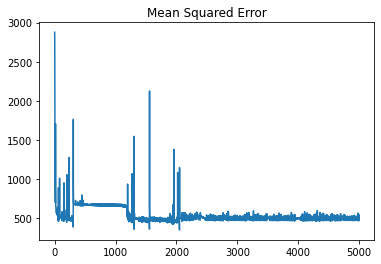

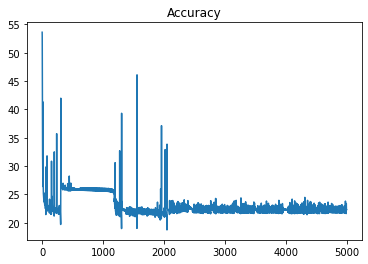

In [9]:
#plotting mse as a function of the number of iterations
results.mse.plot(title="Mean Squared Error")
plt.show()

#plotting accuracy as a function of the number of iterations
results.accuracy.plot(title="Accuracy")
plt.show()

Average MSE=321.26857833639025 , and Average Accuracy=17.084685933010924


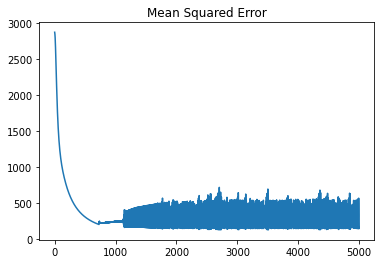

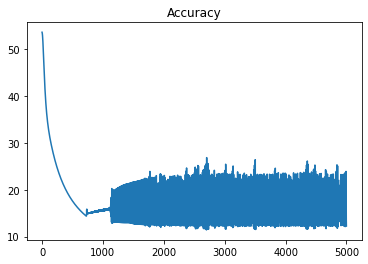

150.70672117397285


In [22]:
#What is the effect of the learning rate on the training process? Vary the learning rate to be
#between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate.

#choosing hyperparameters  at random such as learning rate, iterations, input size, number of hidden layers, and number of output layers.

# Initial variables
learning_rate = 0.01
iterations = 5000
N = y_train.size

# number of input features
input_size = 2

# number of hidden layers neurons applied
hidden_size = 5

# number of neurons selected for the output layer
output_size = 1

# putting the mse, accuracy and loss into a dataframe
results = pd.DataFrame(columns=["mse", "accuracy","loss"])


#choosing random weights for hidden and output layers.
# Initialize weights
np.random.seed(10)

# weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 




# defining functions that will be used.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def loss_function(y_pred, y_true):
  return (y_pred-y_true)

def identity(x):
  return x


for itr in range(iterations):    
     
    # using the feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 
    # using the feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = identity(Z2)
     
     
    # finding the error
    mse = mean_squared_error(A2, y_train)
    acc = np.sqrt(mse)
    loss = loss_function(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc, "loss":loss},ignore_index=True )
     
    # Backpropagation 
    E1 = A2 - y_train
    dW1 = E1 * 1
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
     
    # Updating my weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update


# report average MSE and Average Accuracy
average_mse= results.mse.mean()
average_accuracy= results.accuracy.mean()
print('Average MSE='+ str(average_mse),', and Average Accuracy='+ str(average_accuracy))



#plotting mse as a function of the number of iterations
results.mse.plot(title="Mean Squared Error")
plt.show()

#plotting accuracy as a function of the number of iterations
results.accuracy.plot(title="Accuracy")
plt.show()

# final loss
print(results['mse'].iloc[-1])



When the learning rate is changed from 0.2 to 0.01, the average mse decreased from 531 to 321. The accuracy decreased as well from 22.9 to 17.1.

In [11]:
#### trying to use different neurons in hidden layer FOR QUESTION 6 ##########

# using 7 neuron in hidden layer which is an increase from 5 neurons that was originally used. 


#choosing random hyperparameters such as learning rate, iterations, input size, number of hidden layers, and number of output layers.

# Initialize variables
learning_rate = 0.01
iterations = 5000
N = y_train.size

# number of input features
input_size = 2

# number of hidden layers neurons
hidden_size = 7

# number of neurons at the output layer
output_size = 1

results = pd.DataFrame(columns=["mse", "accuracy","loss"])



#random the weights for hidden and output layers.
# Initialize weights
np.random.seed(10)

#  weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

#  weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 




for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = identity(Z2)
     
     
    # Calculating the error
    mse = mean_squared_error(A2, y_train)
    acc = np.sqrt(mse)
    loss = loss_function(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc, "loss":loss},ignore_index=True )
     
    # Backpropagation phase
    E1 = A2 - y_train
    dW1 = E1 * 1
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
     
    # Updating the weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update





# report average MSE and Average Accuracy
average_mse= results.mse.mean()
average_accuracy= results.accuracy.mean()
print('Average MSE='+ str(average_mse),', and Average Accuracy='+ str(average_accuracy))




Average MSE=198.31922277075228 , and Average Accuracy=13.41632477218118


The update rule doe not have to be changed or derived because the derivation of update rule is not dependent on the number of neurons in the hidden layer. The chosen function is what is needed in update rule. 

108.83708483762632


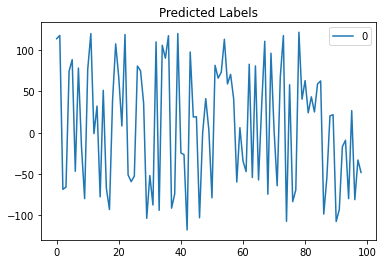

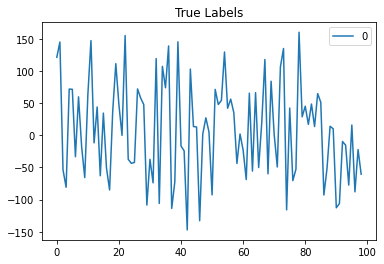

In [13]:

# Report your observations by reporting the final loss and plotting the true labels and
#your predicted labels, along with a brief (2-3 lines) description.

# final loss
print(results['mse'].iloc[-1])

#6B
# plotting predicted labels
predicted_y= pd.DataFrame(A2)
predicted_y.plot()
plt.title('Predicted Labels')
plt.show()

# plotting true labels
true_y = pd.DataFrame(y_train)
true_y.plot()
plt.title('True Labels')
plt.show()




The predicted and true labels graph show similar patterns. 
The final loss decreases when the number of neurons increased in the hidden layer from 150.706 to 108.84. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


Average MSE=880.909929173311 , and Average Accuracy=29.468441945853993
nan


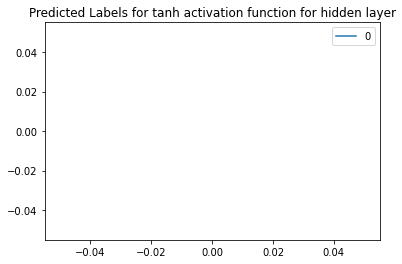

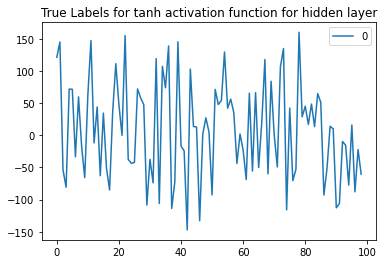

In [18]:
#### QUESTION 7 using tanh for activation function of hidden layer##########
#Lets initialize the hyperparameters such as learning rate, iterations, input size, number of hidden layers, and number of output layers.

# Initialize variables
learning_rate = 0.01
iterations = 5000
N = y_train.size

# number of input features
input_size = 2

# number of hidden layers neurons
hidden_size = 7

# number of neurons at the output layer
output_size = 1

results = pd.DataFrame(columns=["mse", "accuracy","loss"])


#random weights for hidden and output layers.
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 


# functions needed
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_function(y_pred, y_true):
  return (y_pred-y_true)

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 

def identity(x):
  return x


###### backpropagation ####
for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = tanh(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = identity(Z2)
     
     
    # finding the error
    mse = mean_squared_error(A2, y_train)
    loss = loss_function(A2, y_train)
    acc = np.sqrt(mse)
    results=results.append({"mse":mse, "accuracy":acc, "loss":loss},ignore_index=True )
 
    # Backpropagation 
    E1 = A2 - y_train
    dW1 = E1 * 1
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * (1-tanh(A1)**2)
 
     
    # Updating the weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update



# report average MSE and Average Accuracy
average_mse= results.mse.mean()
average_accuracy= results.accuracy.mean()
print('Average MSE='+ str(average_mse),', and Average Accuracy='+ str(average_accuracy))


# final loss
print(results['mse'].iloc[-1])

#6B
# plotting predicted labels
predicted_y= pd.DataFrame(A2)
predicted_y.plot()
plt.title('Predicted Labels for tanh activation function for hidden layer')
plt.show()

# plotting true labels
true_y = pd.DataFrame(y_train)
true_y.plot()
plt.title('True Labels for tanh activation function for hidden layer')
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in square


Average MSE=inf , and Average Accuracy=inf
nan


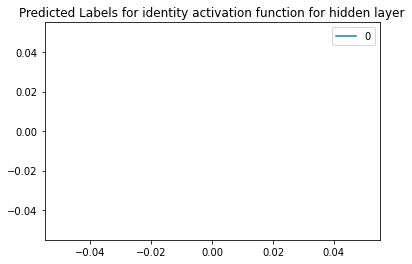

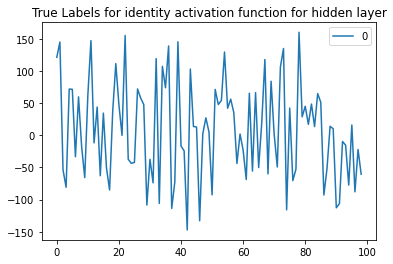

In [19]:


#### QUESTION 7 using identity as hidden layer activation##########
#Lets initialize the hyperparameters such as learning rate, iterations, input size, number of hidden layers, and number of output layers.

# Initialize variables
learning_rate = 0.2
iterations = 5000
N = y_train.size

# number of input features
input_size = 2

# number of hidden layers neurons
hidden_size = 7

# number of neurons at the output layer
output_size = 1

results = pd.DataFrame(columns=["mse", "accuracy","loss"])


#random the weights for hidden and output layers.
# Initialize weights
np.random.seed(10)

# random weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# random weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 


# functions needed
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_function(y_pred, y_true):
  return (y_pred-y_true)

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def tanh(x):
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)) 

def identity(x):
  return x


###### backpropagation ####
for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = identity(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = identity(Z2)
     
     
    # Calculating the error
    mse = mean_squared_error(A2, y_train)
    loss = loss_function(A2, y_train)
    acc = np.sqrt(mse)
    results=results.append({"mse":mse, "accuracy":acc, "loss":loss},ignore_index=True )
 
    # Backpropagation phase
    E1 = A2 - y_train
    dW1 = E1 * 1
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * 1
 
     
    # Updating the weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update



# report average MSE and Average Accuracy
average_mse= results.mse.mean()
average_accuracy= results.accuracy.mean()
print('Average MSE='+ str(average_mse),', and Average Accuracy='+ str(average_accuracy))


# final loss
print(results['mse'].iloc[-1])

#6B
# plotting predicted labels
predicted_y= pd.DataFrame(A2)
predicted_y.plot()
plt.title('Predicted Labels for identity activation function for hidden layer')
plt.show()

# plotting true labels
true_y = pd.DataFrame(y_train)
true_y.plot()
plt.title('True Labels for identity activation function for hidden layer')
plt.show()


7a. I need to change the update rule. \\
7b. I will need to use the derivative of the new activation function chosen for the hidden layer ( ei the tanh and identity activation function chosen for this question). \\
7c. The final loss for using both tanh and identity activation function in hidden layer is NAN and no values were observed for their predicted values by accessing the produced graph. For identity activation function, its average MSE and average Accuracy is infinity. Tanh's average MSE and average accuracy is 880.00 and 29.468.     
